In [18]:
import pickle
import pandas as pd
from bs4 import BeautifulSoup as bs
import re

In [4]:
with open('jobs_linkedin_html.pickle', 'rb') as handle:
    jobs = pickle.load(handle)

len(jobs)

2596

In [8]:
break_counts = []

In [9]:
for key, value in jobs.items():
    description = (value['description'])
    break_counts.append(description.count('<br/>'))

In [10]:
len(break_counts)

2596

In [11]:
import matplotlib.pyplot as plt

(array([320., 279., 267., 291., 247., 324., 180., 143.,  96., 116.,  70.,
         64.,  32.,  42.,  32.,  22.,  15.,  30.,   3.,   1.,   3.,   1.,
          3.,   8.,   3.,   0.,   1.,   1.,   0.,   2.]),
 array([  0. ,   4.4,   8.8,  13.2,  17.6,  22. ,  26.4,  30.8,  35.2,
         39.6,  44. ,  48.4,  52.8,  57.2,  61.6,  66. ,  70.4,  74.8,
         79.2,  83.6,  88. ,  92.4,  96.8, 101.2, 105.6, 110. , 114.4,
        118.8, 123.2, 127.6, 132. ]),
 <BarContainer object of 30 artists>)

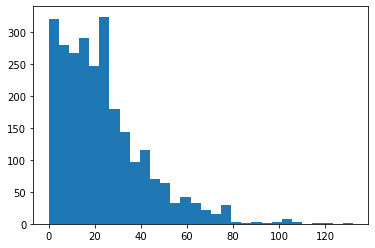

In [14]:
plt.hist(break_counts, density=False, bins=30)

In [19]:
line_counts = []

In [23]:
for key, value in jobs.items():
    description = (value['description'])
    soup = bs(description)
    text = soup.get_text("|", strip=True)
    line_counts.append(text.count('|'))

In [24]:
text

'The Real Estate Data Scientist will report to the Director of Real Estate Strategy. The Real Estate Data Scientist will be actively engaged in analytics on the individual store and market level to further help decide where to open successful Harbor Freight stores through time in the field and at corporate while assisting with the new store opening process. To be successful in this role, this individual will need a deep understanding of what makes a successful store, how to sustainably grow markets and new store growth strategy through data analysis supplemented with time visiting markets while performing additional project-based analyses and department level reporting as required to facilitate Harbor Freight’s growth. Based upon successful performance in this role, this position can be a stepping stone to either further roles in real estate strategy, or a number of other highly analytical roles within the organization such as Data Analytics, Corporate Strategy, Merchandising Finance t

In [22]:
line_counts

[17]

(array([ 35.,  51.,  40., 100., 174., 296., 271., 357., 309., 176., 215.,
        118., 124.,  85.,  84.,  65.,  19.,  25.,  10.,   5.,  25.,   1.,
          1.,   1.,   1.,   0.,   0.,   1.,   5.,   3.]),
 array([  2.        ,   5.56666667,   9.13333333,  12.7       ,
         16.26666667,  19.83333333,  23.4       ,  26.96666667,
         30.53333333,  34.1       ,  37.66666667,  41.23333333,
         44.8       ,  48.36666667,  51.93333333,  55.5       ,
         59.06666667,  62.63333333,  66.2       ,  69.76666667,
         73.33333333,  76.9       ,  80.46666667,  84.03333333,
         87.6       ,  91.16666667,  94.73333333,  98.3       ,
        101.86666667, 105.43333333, 109.        ]),
 <BarContainer object of 30 artists>)

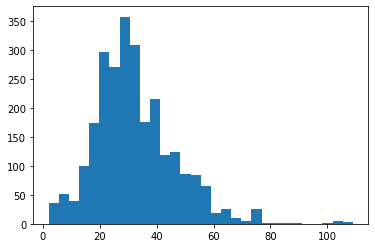

In [25]:
plt.hist(line_counts, density=False, bins=30)

In [29]:
counter = 0

for key, value in jobs.items():
    description = (value['description'])
    soup = bs(description)
    text = soup.get_text("|", strip=True)

    print(text)
    print('\n')
    counter += 1
    if (counter > 15):
        break

I am looking for a self-motivated data scientist with machine learning experience. You will be working on a ground-breaking cloud R&D platform designed to integrate the volumes of scientific resources, helping to build a digital workplace with direct impact on human health, pharmaceutical research and Life Sciences companies. This opportunity requires a strong technical background in machine learning; utilizing methods for understanding large scale biological data.|Responsibilities:|•	Design and implement ML methods on proprietary and open-access datasets;|•	Utilize large-scale datasets to generate statistically motivated research hypotheses;|•	Apply statistical methods to rigorously test and evaluate research hypotheses;|•	Develop and foster external collaborations;|•	Provide expert technical guidance and support customers in the design and analysis of experiments;|•	Work both independently and as part of a collaborative team to develop data analysis and machine learning solutions.|Re

In [49]:
example_text = ".|Responsibilities:|•	Design and implement ML methods on proprietary and open-access datasets;|•	Utilize large-scale datasets to generate statistically motivated research hypotheses;|•	Apply statistical methods to rigorously test and evaluate research hypotheses;|•	Develop and foster external collaborations;|•	Provide expert technical guidance and support customers in the design and analysis of experiments;|•	ependently and as part of a collaborative team to develop data analysis and machine learning solutions.|Requirements:|•	Work both independently and as part of a collaborative team to develop data analysis and machine learning solutions.|Requirements:|•	P"


# pattern = "(?<=Responsibilities).*?(||)"
pattern = "Responsibilities(.*?)\|.{0,20}\|"

match = re.findall(pattern, example_text)
match

[':|•\tDesign and implement ML methods on proprietary and open-access datasets;|•\tUtilize large-scale datasets to generate statistically motivated research hypotheses;|•\tApply statistical methods to rigorously test and evaluate research hypotheses;|•\tDevelop and foster external collaborations;|•\tProvide expert technical guidance and support customers in the design and analysis of experiments;|•\tependently and as part of a collaborative team to develop data analysis and machine learning solutions.']

In [14]:
# pattern = "Responsibilities(.*?)\|.{0,16}\|"
pattern_start = "[Rr]esponsibilities|[Ww]hat [Yy]ou['’]ll|[Ww]hat [Yy]ou [Ww]ill|[Dd]uties|[Tt]he [Rr]ole.{0,10}\||[Oo]verview|[Ww]ork.{0,10}\|"
# pattern_end = "\|.{0,16}\||requirements|qualifications|skills.{0,10}\||looking for|you have"
pattern_end = "Requirements|[Qq]ualifications|Skills.{0,10}\||[Ll]ooking [Ff]or.{0,5}\||[Yy]ou [Hh]ave:"

pattern = f"(?:{pattern_start})(.*?)(?:{pattern_end})"

In [15]:
job_responsibilities = {}

In [16]:
len(jobs)

2596

In [148]:
# pattern = "Responsibilities(.*?)\|.{0,16}\|"
# pattern = "(?:responsibilities|what you['’]ll)(.*?)(?:\|.{0,16}\||requirements|qualifications|skills|looking for|you have)"

In [19]:
counter = 0

for key, value in jobs.items():
    description = (value['description'])
    soup = bs(description)
    text = soup.get_text("|", strip=True)

    match = re.findall(pattern, text)

    if match and len(match[0]) > 75:
        job_responsibilities[key] = match[0]

    counter += 1
#     if (counter > 30):
#         break

In [150]:
counter = 0

for key, value in job_responsibilities.items():
    # if (counter > 0):
    print("https://www.linkedin.com/jobs-guest/jobs/api/jobPosting/" + key + "\n")
    print(value)
    print("\n")

    counter += 1
    if (counter > 50) :
        break

https://www.linkedin.com/jobs-guest/jobs/api/jobPosting/2908496770

:|•	Design and implement ML methods on proprietary and open-access datasets;|•	Utilize large-scale datasets to generate statistically motivated research hypotheses;|•	Apply statistical methods to rigorously test and evaluate research hypotheses;|•	Develop and foster external collaborations;|•	Provide expert technical guidance and support customers in the design and analysis of experiments;|•	Work both independently and as part of a collaborative team to develop data analysis and machine learning solutions.|


https://www.linkedin.com/jobs-guest/jobs/api/jobPosting/2911267267

:|• Provide consultative support as and when required and should be able|to handle complex|projects independently|• Perform exploratory data analysis, data deep dives and generate data|insights|• Substantial portion of work would require advanced Data Modelling and|Data Wrangling|• Responsible for implementing multiple model types/methodologies, w

In [20]:
len(job_responsibilities)

1332

In [140]:
# short_count = 0
#
# for key, value in job_responsibilities.items():
#     if len(value) < 75:
#         short_count +=1
#
# short_count

18

In [21]:
df = pd.DataFrame.from_dict(job_responsibilities, columns=["description"], orient='index')
df.head()

,description
2908496770,:|•\tDesign and implement ML methods on propri...
2911267267,:|• Provide consultative support as and when r...
2912844894,:|Support Data and Analytics team through deve...
2911205495,|Build agent-based simulations of smart contra...
2912480226,"|Productionize, launch, and monitor predictive..."


In [22]:
df.shape

(1332, 1)

In [24]:
df2 = df.drop_duplicates()

In [25]:
df2.shape

(1063, 1)

In [26]:
df2.to_pickle('responsibilities_df_1.pickle')